In [10]:
import time
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("Data set/CAR_EVALUATION.csv")
df

,buying,maint,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Explored Data Analysis(EDA) on the dataset

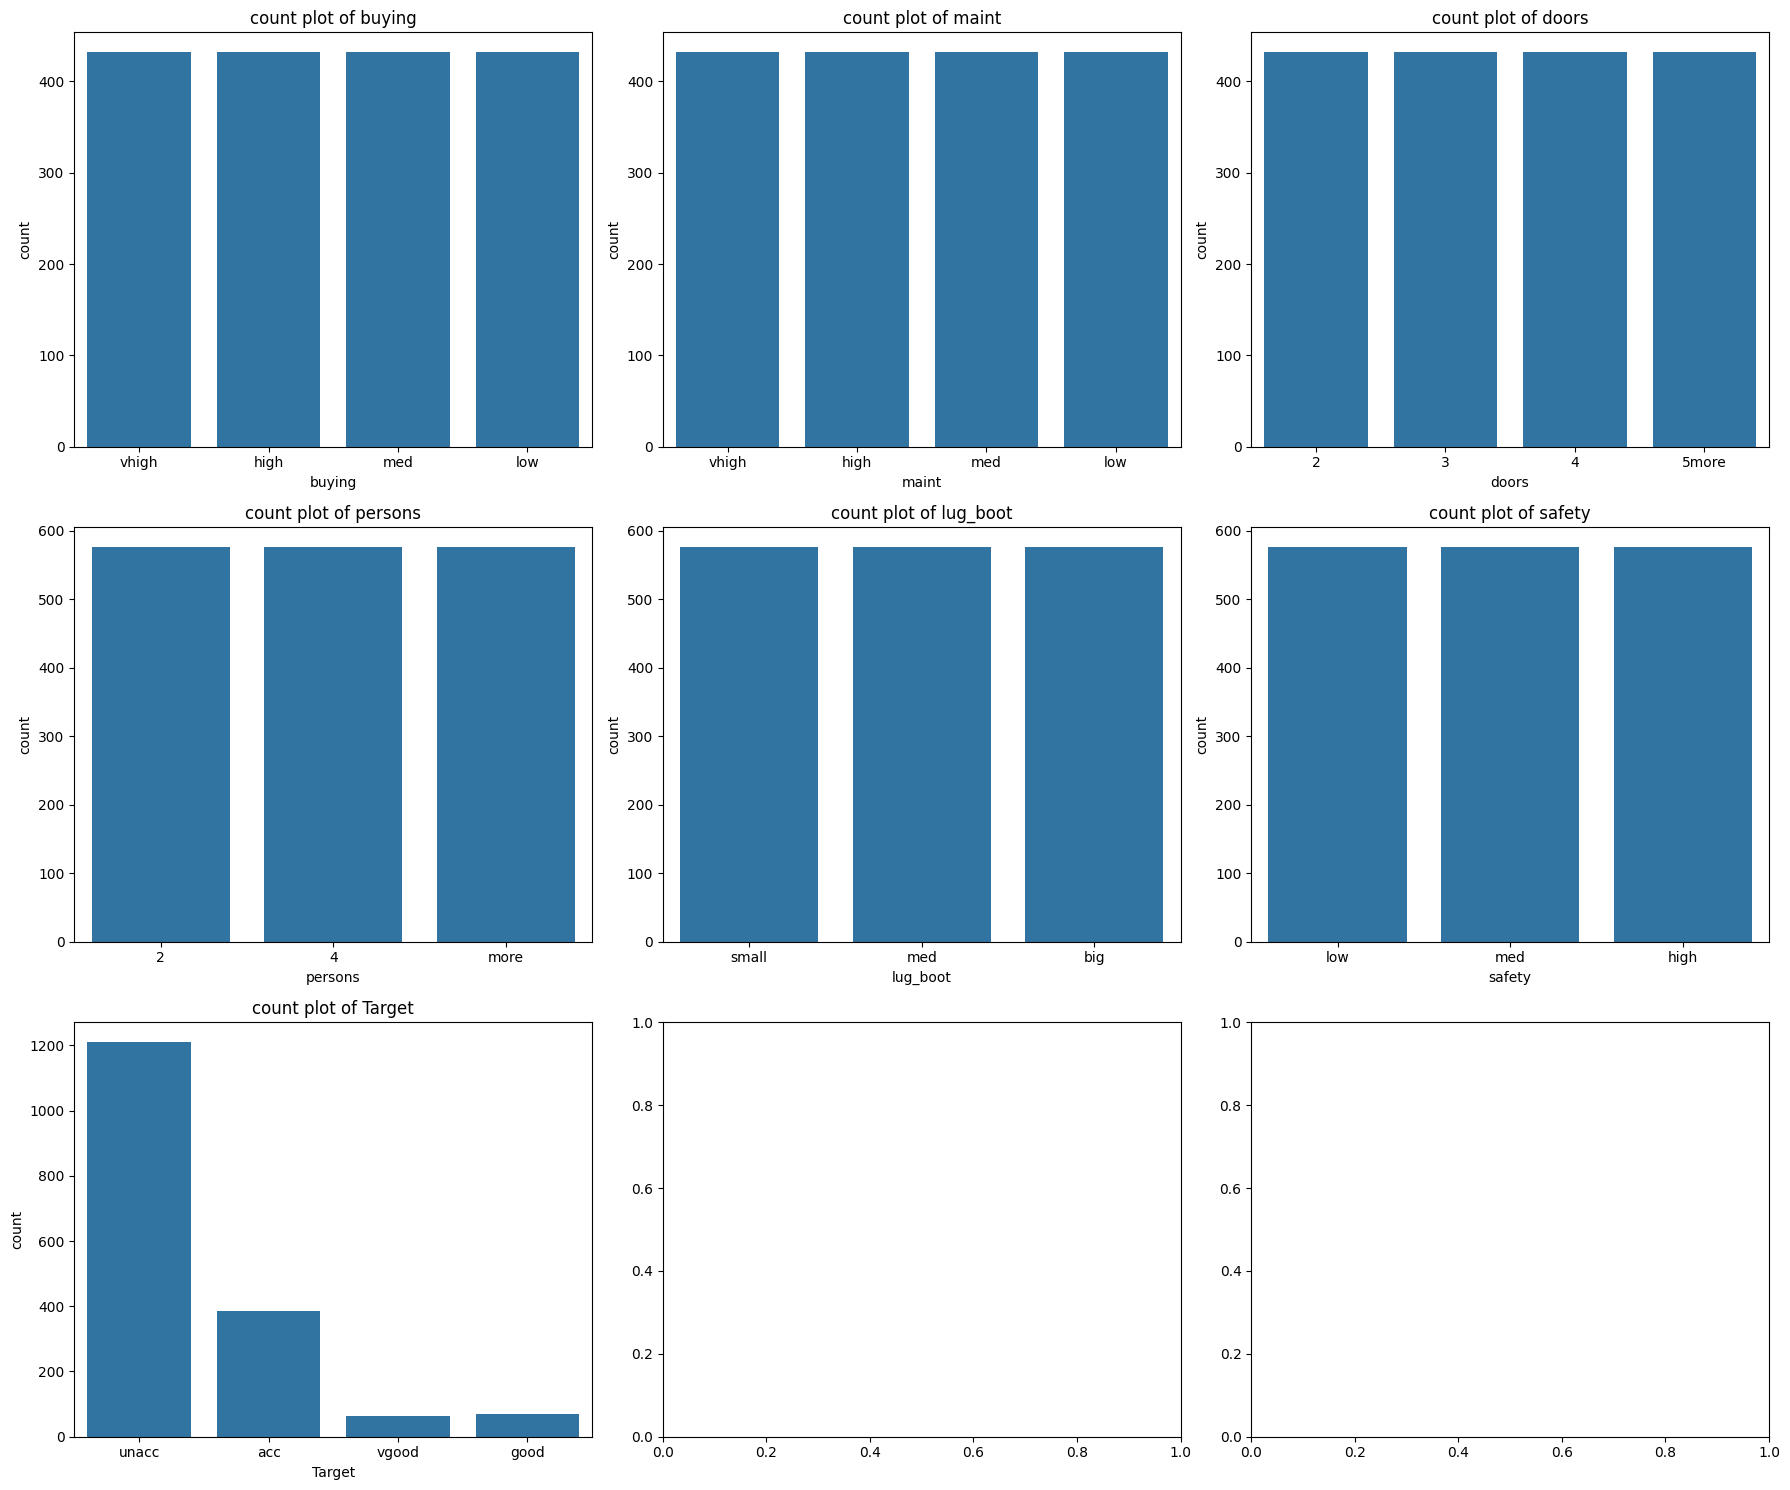

In [3]:
fig,ax=plt.subplots(3,3,figsize=(18,15))
for i,col in enumerate(df.columns):
    axs=ax[i//3,i%3]
    sns.countplot(x=df[col],ax=axs)
    axs.set_title(f"count plot of {col}")
plt.tight_layout()
plt.show()

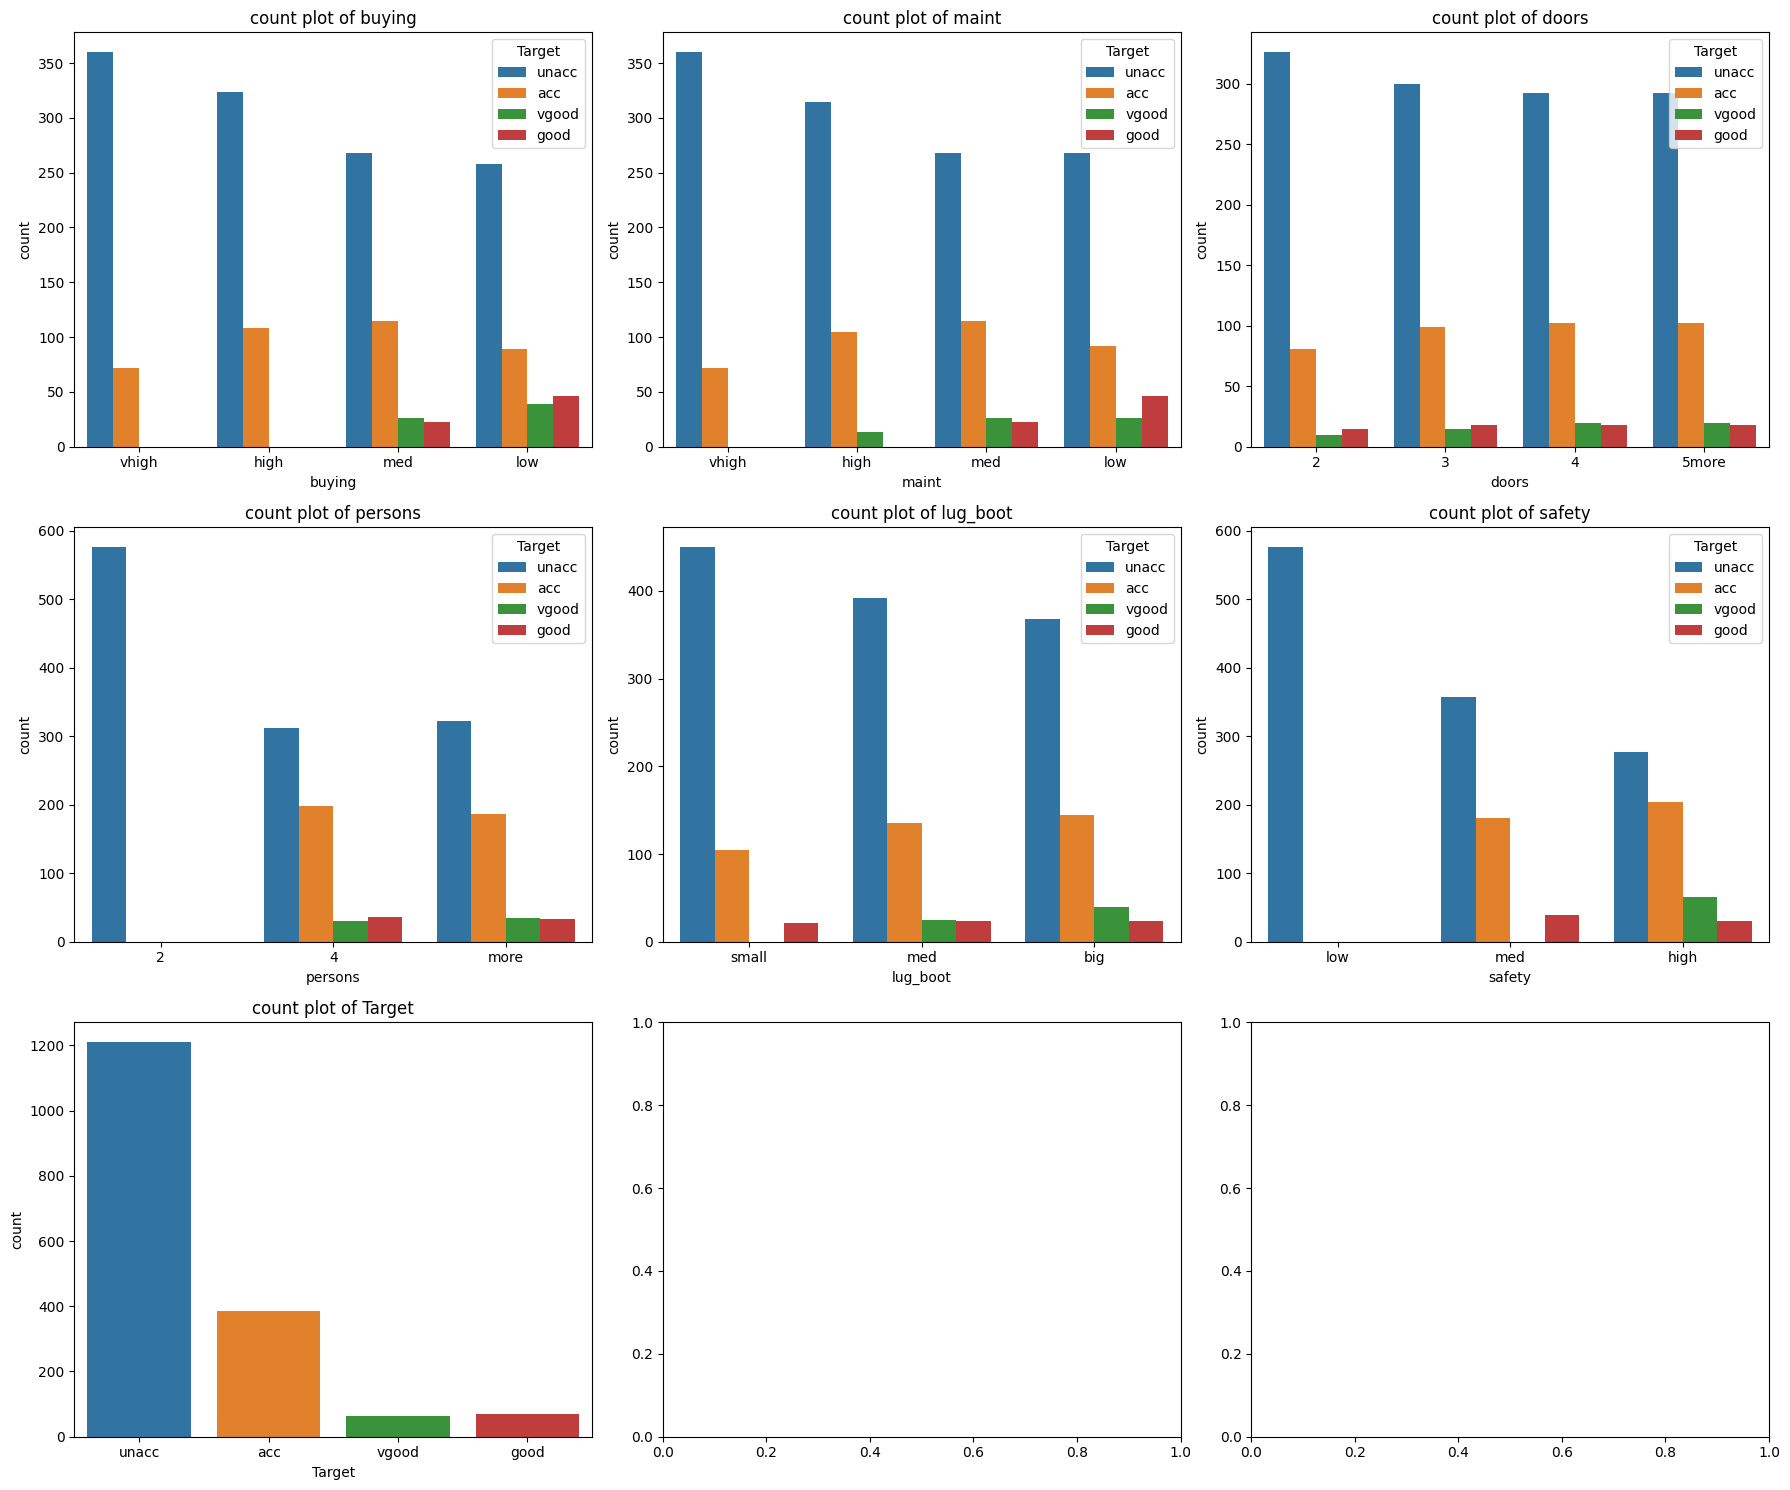

In [4]:
fig,ax=plt.subplots(3,3,figsize=(18,15))
for i,col in enumerate(df.columns):
    axs=ax[i//3,i%3]
    sns.countplot(x=df[col],hue=df['Target'],ax=axs)
    axs.set_title(f"count plot of {col}")
plt.tight_layout()
plt.show()

### Encoding the categorical variables into numerical values.

In [5]:
label=LabelEncoder()

for col in df.columns:
    df[col]=label.fit_transform(df[col])
df

,buying,maint,doors,persons,lug_boot,safety,Target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [6]:
# Splitting the dataset into Features and Target variables.
x=df.drop("Target",axis=1)
y=df['Target']

#### In this dataset, there are 1728 samples in total. Firstly, you need to shuffle the dataset and split the dataset into a training set with 1000 samples and a validation set with 300 samples and a testing set with 428 samples.Use python to implement this data preparation step

In [7]:
x_temp,x_test,y_temp,y_test=train_test_split(x,y,test_size=428,random_state=42,shuffle=True)
x_train,x_val,y_train,y_val=train_test_split(x_temp,y_temp,test_size=300,random_state=42,shuffle=True)

print(f"Sample of Training is {x_train.shape[0]} ")
print(f"Sample of Test is {x_test.shape[0]} ")
print(f"Sample of Validation is {x_val.shape[0]} ")

Sample of Training is 1000 
Sample of Test is 428 
Sample of Validation is 300 


####  Try to use different number of training samples to show the impact of number of training samples. Use 10%,20%, 30%, 40%, 50%, 60%, 70%, 80%, 90% and 100% of the training set for 10 separate KNN classifiers and show their performance (accuracy score) on the validation set and testing set. You can specify a fixed K=2 value (nearest neighbor) in this question. Notably, X axis is the portion of the training set, Y axis should be the accuracy score. There should be two lines in total, one is for the validation set and another is for the testing set

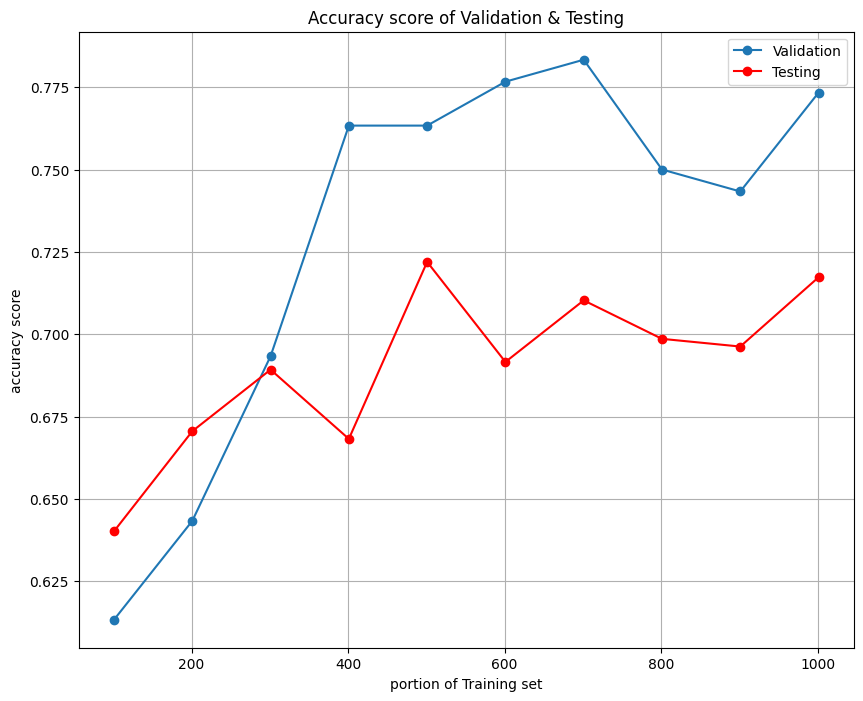

In [8]:
val_accuracy=[]
test_accuracy=[]

knn=KNeighborsClassifier(n_neighbors=2)

for i in range(101,1101,100):
    knn.fit(x_train.iloc[0:i,:],y_train[0:i])
    ypred_test=knn.predict(x_test)
    ypred_val=knn.predict(x_val)
    val_accuracy.append(accuracy_score(y_val,ypred_val))
    test_accuracy.append(accuracy_score(y_test,ypred_test))

plt.figure(figsize=(10,8))
plt.plot(range(101,1101,100),val_accuracy,marker='o',label='Validation')
plt.plot(range(101,1101,100),test_accuracy,marker='o',label='Testing',color='r')
plt.title("Accuracy score of Validation & Testing")
plt.xlabel('portion of Training set')
plt.ylabel("accuracy score")
plt.grid()
plt.legend()
plt.show()

#### Use 100% of training samples, try to find the best K value, and show the accuracy curve on the validation set when K varies from 1 to 10.

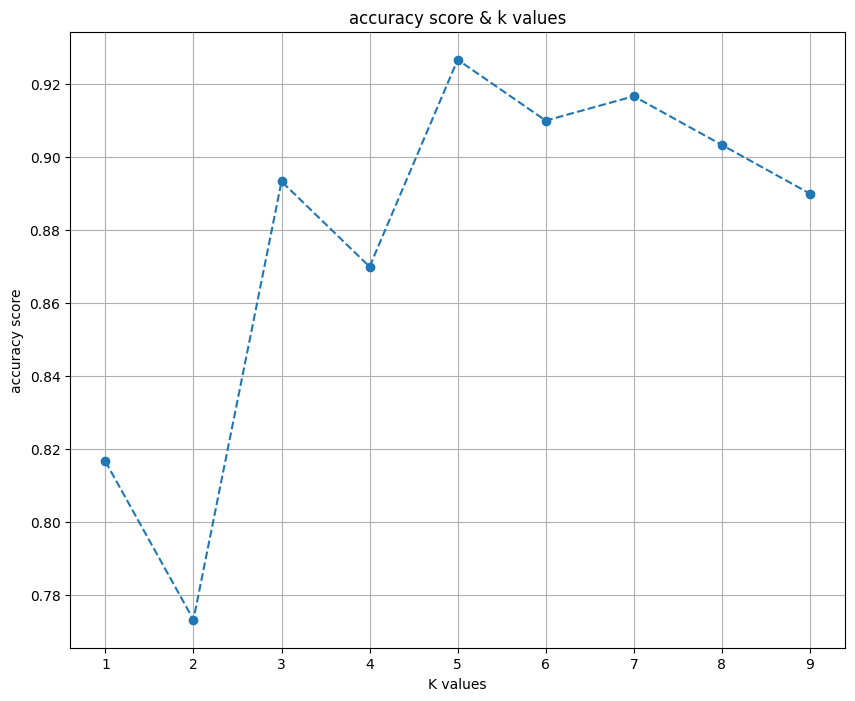

In [9]:
accuracy_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_val)
    accuracy_rate.append(accuracy_score(ypred,y_val))

plt.figure(figsize=(10,8))
plt.plot(range(1,10),accuracy_rate,marker='o',linestyle='dashed')
plt.title('accuracy score & k values')
plt.xlabel('K values')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

###  Analysis the training time when use different number of training samples. Consider the following 4 cases:
#### 10% of the whole training set and K = 2
#### 100% of the whole training set and K = 2
#### 10% of the whole training set and K = 10
#### 100% of the whole training set and K = 10.
#### Plot a bar chart figure to show the prediction time on the testing set

C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_60324\1990730530.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label,y=training_times,palette='Set1')


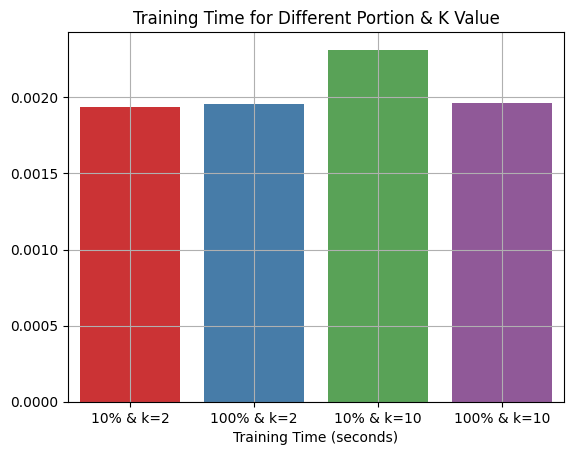

In [12]:
portion=[100,1000]
k_values=[2,10]
training_times=[]

for i in portion:
    for k in k_values:
        knn=KNeighborsClassifier(n_neighbors=k)
        
        
        start_time=time.time()
        knn.fit(x_train.iloc[0:i,:],y_train[0:i])
        end_time=time.time()
        
        training_time=end_time-start_time
        training_times.append(training_time)

label=['10% & k=2','100% & k=2','10% & k=10','100% & k=10']
sns.barplot(x=label,y=training_times,palette='Set1')
plt.title('Training Time for Different Portion & K Value')
plt.xlabel('portion & k values')
plt.xlabel('Training Time (seconds)')
plt.grid()
plt.show()